# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [117]:
! git clone https://github.com/anishjagota/undergrad_ml_assignments

fatal: destination path 'undergrad_ml_assignments' already exists and is not an empty directory.


In [118]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

In [ ]:
#Question 1.1
import pandas as pd
import numpy as np

airbnb = pd.read_csv("/content/data/airbnb_NYC.csv", encoding='latin1')
airbnb["Price"].head(10)
airbnb["Price"].sort_values(ascending=False).head()
airbnb.loc[
    airbnb["Price"].astype(str).str.contains(","),
    "Price"
].head()

airbnb["Price_clean"] = (
    airbnb["Price"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(float)
)
airbnb["Price_clean"].dtype
airbnb["Price_clean"].sort_values(ascending=False).head()
airbnb["Price_clean"].isna().sum()





np.int64(0)

**Question 1.1:**
The Price variable is stored as an object because some prices contain commas (e.g., “1,112”). As a result, sorting the original Price column is done lexicographically, which makes 999 appear as the maximum value. Removing commas and converting the variable to a numeric type fixes this issue. After cleaning, there are 0 missing values in the Price variable.

In [ ]:
#Question 1.2
police = pd.read_csv("/content/data/mn_police_use_of_force.csv")
police.head()


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [ ]:
print(police["subject_injury"].isna().mean())
police["subject_injury"].value_counts(dropna=False)




0.7619342359767892


,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [ ]:
pd.crosstab(
    police["force_type"],
    police["subject_injury_clean"],
    dropna=False
)


subject_injury_clean,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


In [ ]:
police["subject_injury_clean"] = police["subject_injury"].map({
    "Yes": "Yes",
    "No": "No"
})

police["subject_injury_clean"].value_counts(dropna=False)


,count
subject_injury_clean,
NaN,9848
Yes,1631
No,1446


In [ ]:
police["subject_injury_clean"] = (
    police["subject_injury_clean"]
    .fillna("Missing")
)

police["subject_injury_clean"].value_counts()


,count
subject_injury_clean,
Missing,9848
Yes,1631
No,1446


**Question 1.2:** subject_injury variable contains a proportion of approximately 76% missing values . I cleaned the variable to retain only valid “Yes” and “No” responses, and missing values were examined using a cross-tabulation with force_type. Missingness appears more common for cateogires like "Bodily Force" and "Taser". Instead of "NaN," remaining missing values were labeled as “Missing” to preserve information about incomplete records

In [ ]:
#Question 1.3
metabric = pd.read_csv("/content/data/metabric.csv")
metabric.head()


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [ ]:
metabric["Overall Survival Status"].value_counts(dropna=False)


,count
Overall Survival Status,
1:DECEASED,768
0:LIVING,575


In [ ]:
metabric["survival_binary"] = metabric["Overall Survival Status"].map({
    "1:DECEASED": 0,
    "0:LIVING": 1
})


In [ ]:
metabric["survival_binary"].value_counts(dropna=False)


,count
survival_binary,
0,768
1,575


In [ ]:
#Question 1.4
airbnb = pd.read_csv("/content/data/airbnb_NYC.csv", encoding="latin1")
airbnb.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
print(airbnb["Review Scores Rating"].isna().sum())
airbnb["Review Scores Rating"].describe()


8323


,Review Scores Rating
count,22155.000000
mean,91.993230
std,8.850373
min,20.000000
25%,89.000000
50%,94.000000
75%,100.000000
max,100.000000


In [ ]:
median_rating = airbnb["Review Scores Rating"].median()
print(median_rating)
airbnb["Review Scores Rating_imputed"] = (
    airbnb["Review Scores Rating"]
    .fillna(median_rating)
)
airbnb["Review Scores Rating_imputed"].isna().sum()



94.0


np.int64(0)

**Question 1.4:** There are a total of 8,323 missing values. I created a new variable by imputing the median review score of 94 for the missing observations.  If missingness is systematic this may distort relationships with other variables and cause bias to exist.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [ ]:
#2.1
shark = pd.read_excel("/content/GSAF5 (1).xls")
shark.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#2.2
print(shark.isna().sum().sort_values(ascending=False))
shark = shark.loc[:, ~shark.columns.str.contains("^Unnamed")]
shark.shape




Unnamed: 21       7073
Unnamed: 22       7072
Time              3527
Species           3131
Age               2994
Activity           583
Sex                578
Location           567
Fatal Y/N          561
State              487
href formula       280
href               278
Case Number.1      277
Case Number        276
pdf                275
original order     275
Name               218
Country             50
Injury              35
Source              20
Type                18
Year                 2
Date                 0
dtype: int64


(7074, 21)

**Question 2.3:** observation in this dataset is a single shark attack incident involving a human. Each row represents one attack at a specific time and location, along with details about the victim, the circumstances of the attack, and the outcome. Since each row corresponds to one incident, data cleaning and analysis are performed at the row level. Missing values represent unknown information about individual attacks rather than missing events.This tells us that to make decisions, wehave to clean variables without aggregating or removing observations unnecessarily.


In [ ]:
#2.4
print(shark["Year"].describe())
shark["Year"] = pd.to_numeric(shark["Year"], errors="coerce")
shark = shark[shark["Year"] > 0]
shark_1940 = shark[shark["Year"] >= 1940]

shark_1940.shape
attacks_by_year = shark_1940["Year"].value_counts().sort_index()
attacks_by_year.tail(30)



count    7072.000000
mean     1936.004242
std       270.672015
min         0.000000
25%      1948.000000
50%      1987.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64


,count
Year,
1997.0,57
1998.0,65
1999.0,66
2000.0,97
2001.0,92
2002.0,88
2003.0,92
2004.0,92
2005.0,103


**Question 2.4:** Year variable ranges from 0 to 2026 (0 are missing entires) After converting the variable to numeric and filtering to attacks since 1940, the data show that reported shark attacks generally increase over time, especially in recent decades. This increase is likely driven by improved reporting and greater human activity in coastal waters rather than an actual rise in shark aggression. Recent year indicate that it shows trends of dropping though.

<Axes: >

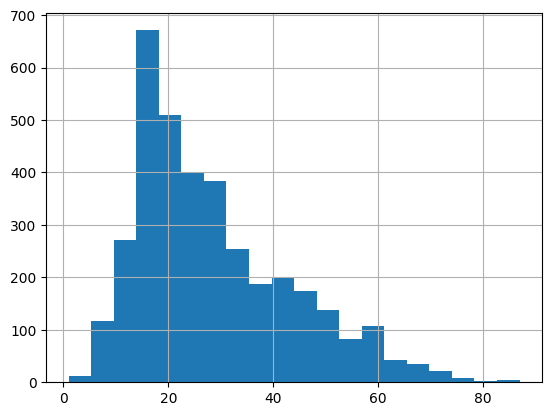

In [ ]:
#2.5
shark_1940 = shark_1940.copy()

shark_1940["Age"] = pd.to_numeric(
    shark_1940["Age"],
    errors="coerce"
)

shark_1940["Age"].hist(bins=20)


In [ ]:
#2.6
print(shark_1940["Type"].value_counts(dropna=False))
shark_1940["Type_clean"] = shark_1940["Type"].where(
    shark_1940["Type"].isin(["Provoked", "Unprovoked"]),
    "Unknown"
)
print(shark_1940["Type_clean"].value_counts())

shark_1940["Type_clean"].value_counts(normalize=True)



Type
Unprovoked             4125
Provoked                521
Invalid                 402
Watercraft              280
Sea Disaster            156
Questionable             26
NaN                      14
Boat                      7
 Provoked                 2
unprovoked                1
Unconfirmed               1
?                         1
Unverified                1
Under investigation       1
Name: count, dtype: int64
Type_clean
Unprovoked    4125
Unknown        892
Provoked       521
Name: count, dtype: int64


,proportion
Type_clean,
Unprovoked,0.744854
Unknown,0.161069
Provoked,0.094077


In [ ]:
#2.7
print(shark_1940["Fatal Y/N"].value_counts(dropna=False))
shark_1940["Fatal_clean"] = shark_1940["Fatal Y/N"].where(
    shark_1940["Fatal Y/N"].isin(["Y", "N"]),
    "Unknown"
)
shark_1940["Fatal_clean"].value_counts()




Fatal Y/N
N          4238
Y           830
NaN         406
UNKNOWN      45
 N            7
F             5
M             3
Nq            1
n             1
2017          1
Y x 2         1
Name: count, dtype: int64


,count
Fatal_clean,
N,4238
Y,830
Unknown,470


In [ ]:
#2.6
pd.crosstab(
    shark_1940["Type_clean"],
    shark_1940["Fatal_clean"],
    normalize="index"
)


Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.953935,0.023033,0.023033
Unknown,0.412556,0.448430,0.139013
Unprovoked,0.817697,0.014061,0.168242


**Question 2.6:** Attacks are much more likely to be fatal when unprovoked than when provoked(16.8% vs 2.3%). Provoked attacks rarely result in death, likely because they occur during controlled human activities, whereas unprovoked attacks involve unexpected deadly shark encounters.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

3.1: The paper introduces “tidy data” as a standard way to structure datasets that makes data manipulation, visualization, and modeling easier and more consistent across tools.


3.2: The tidy data standard provides a consistent data structure where tools can work together smoothly, reducing friction in analysis workflows.


3.3:What the sentence imply is that tidy datasets follow the same structural rules, while messy data can violate those rules in many different, inconsistent ways.The second sentence means that while observations and variables are usually intuitive within a dataset, defining them generally and precisely is surprisingly hard.


3.4:Value is a single measure. Variable is a measured attribute. Observation is all the values measured at one unit.


3.5:Each variable is a column, Each observation is a row, Each type of observation unit forms a table.

3.6: 1. Column headers are values.  2.Multiple variables stored in one column. 3.Variables stored in both rows and columns. 4.Multiple observational units in one table. 5.Same observational unit split across multiple tables.

Table is messy because days are spread across columns, violating the “one variable per column” rule. What melting does is it reshapes wide data into long format by turning column names into values of a variable.


3.7:Table 11: Days are stored as column names so its messy. In Table 12, (molten)days are moved into rows so its closer to tidy. Also each row is one day with separate tmin and tmax columns so its tidy.




**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

The distribution is highly right-skewed. So most gifts are relatively small; while a small number of very large gifts dominate the total dollar amount.


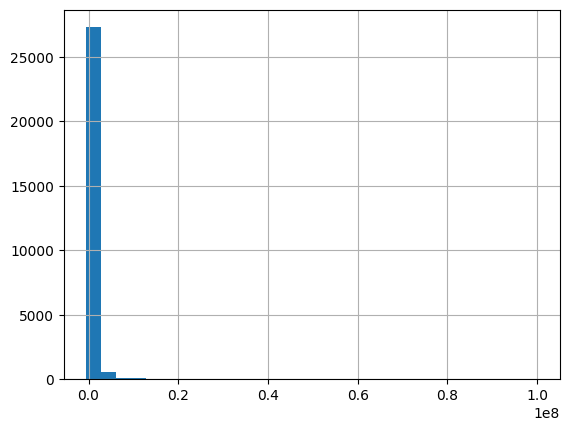

In [121]:
#4.1
fg = pd.read_csv("/content/data/ForeignGifts_edu.csv")
fg.head()

#4.2
fg["Foreign Gift Amount"].describe()
fg["Foreign Gift Amount"].hist(bins=30)
print("The distribution is highly right-skewed. So most gifts are relatively small; while a small number of very large gifts dominate the total dollar amount.")



In [123]:
#4.3
fg["Gift Type"].value_counts(normalize=True)


,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


In [132]:
#4.4
fg.groupby("Country of Giftor").size() \
  .sort_values(ascending=False) \
  .head(15)



,0
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [134]:
fg.groupby("Country of Giftor")["Foreign Gift Amount"].sum() \
  .sort_values(ascending=False) \
  .head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [135]:
#4.5
top_institutions = (
    fg.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

top_institutions


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


<Axes: >

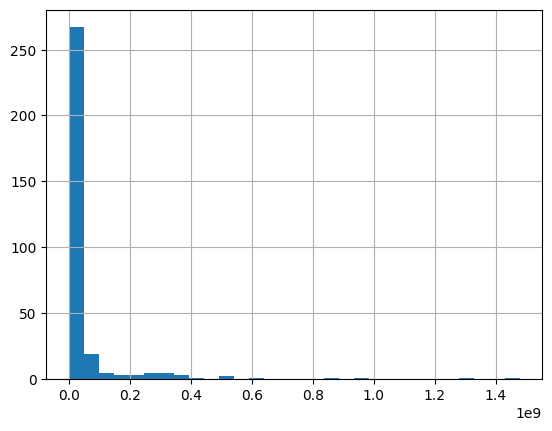

In [139]:
institution_totals = (
    fg.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
)
institution_totals.hist(bins=30)


In [142]:
#4.6
fg.groupby("Giftor Name")["Foreign Gift Amount"] \
  .sum() \
  .sort_values(ascending=False) \
  .head(1)


,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [154]:
#5.1
cc = pd.read_csv("/content/data/college_completion.csv")

#5.2
cc.head
cc.shape
"There are 63 variables and 3798 observations"




'There are 63 variables and 3798 observations'

In [155]:
#5.3
pd.crosstab(cc["control"], cc["level"])


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


**5.3** schools are 2/3 more likely to be 2-year institutions compared to 4-year institutions. Private not-for-profits are almost exclusively 4-year institutions, and private for-profits include substantial numbers of both.

In [159]:
#5.4
cc["grad_100_value"].describe()



,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


<Axes: ylabel='Density'>

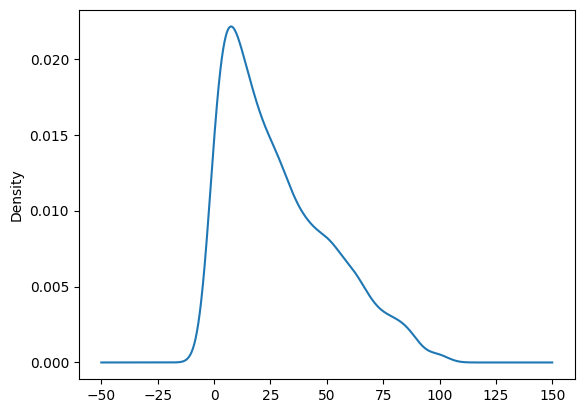

In [160]:
cc["grad_100_value"].plot(kind="density")

,grad_100_value
control,
Private for-profit,"Axes(0.125,0.11;0.775x0.77)"
Private not-for-profit,"Axes(0.125,0.11;0.775x0.77)"
Public,"Axes(0.125,0.11;0.775x0.77)"


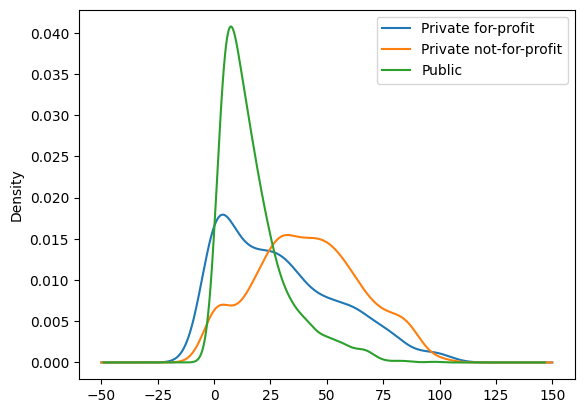

In [162]:
cc.groupby("control")["grad_100_value"].plot(kind="density", legend=True)


In [164]:
cc.groupby("control")["grad_100_value"].describe()


,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


**Question 5.4** not-for-profit institutions have the most favorable graduation outcomes, with the highest mean of 41.66% and median of 41% graduation rates, and their density is shifted noticeably to the right.

                   aid_value  grad_100_value
aid_value       4.121201e+07    88610.483169
grad_100_value  8.861048e+04      543.483382
                aid_value  grad_100_value
aid_value        1.000000        0.575879
grad_100_value   0.575879        1.000000


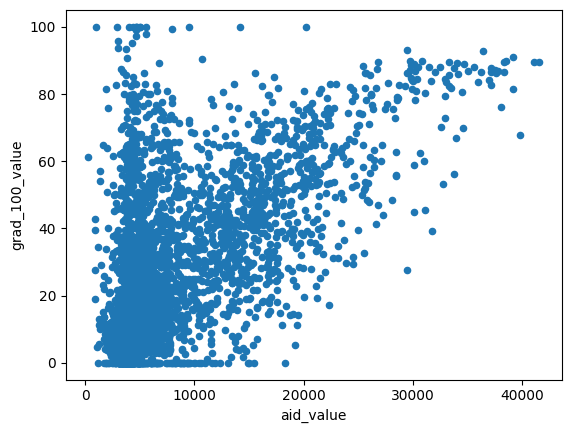

In [166]:
#5.5
cc.plot.scatter(x="aid_value", y="grad_100_value")

print(cc[["aid_value", "grad_100_value"]].cov())
print(cc[["aid_value", "grad_100_value"]].corr())


Private for-profit
                aid_value  grad_100_value
aid_value        1.000000        0.188363
grad_100_value   0.188363        1.000000
Private not-for-profit
                aid_value  grad_100_value
aid_value        1.000000        0.601591
grad_100_value   0.601591        1.000000
Public
                aid_value  grad_100_value
aid_value        1.000000        0.482481
grad_100_value   0.482481        1.000000


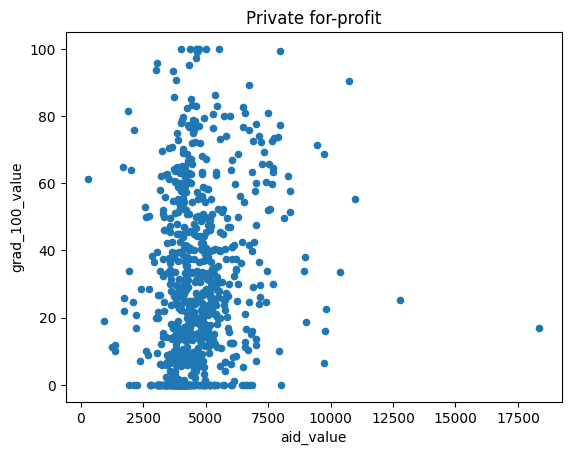

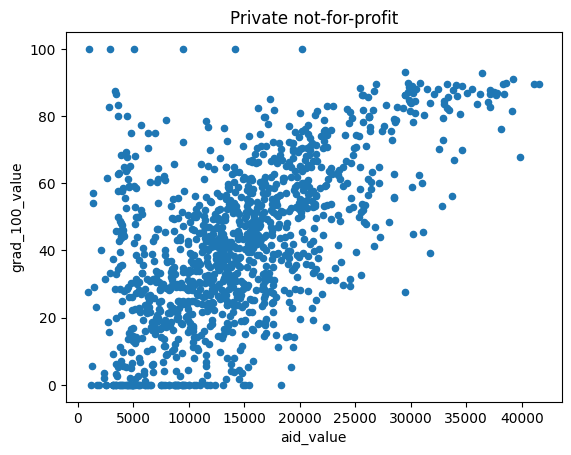

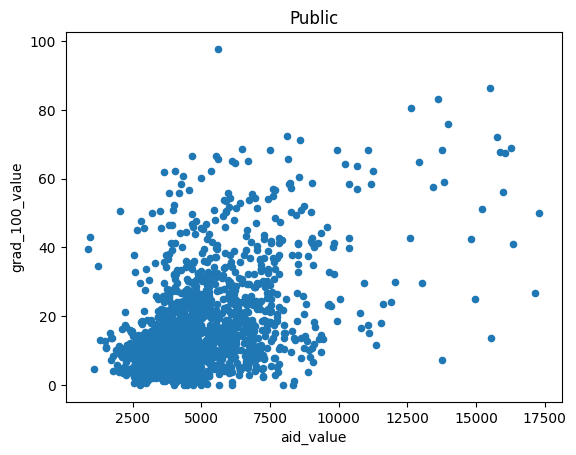

In [167]:
for c, df in cc.groupby("control"):
    print(c)
    print(df[["aid_value", "grad_100_value"]].corr())
    df.plot.scatter(x="aid_value", y="grad_100_value", title=c)


Overall, I feel like there is a positive relationship between student aid and graduation rates. It seems that this relationship is strongest for private not-for-profit institutions, which show a clear upward trend and the highest correlation between aid and graduation rates. Public institutions also exhibit a moderate positive relationship, though with more variability. In contrast, private for-profit institutions is indicating a vertical line.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [169]:
#7.1
ap = pd.read_csv("/content/data/ames_prices.csv")
ap.head()


,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


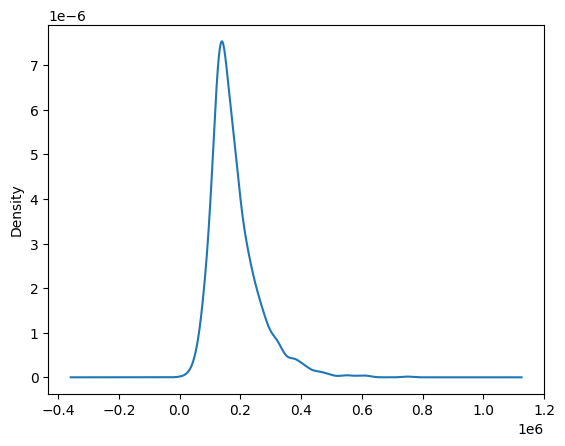

In [174]:
# 7.2
ap["price"].plot(kind="density")
ap["price"].describe()


,price
Bldg.Type,
1Fam,"Axes(0.125,0.11;0.775x0.77)"
2fmCon,"Axes(0.125,0.11;0.775x0.77)"
Duplex,"Axes(0.125,0.11;0.775x0.77)"
Twnhs,"Axes(0.125,0.11;0.775x0.77)"
TwnhsE,"Axes(0.125,0.11;0.775x0.77)"


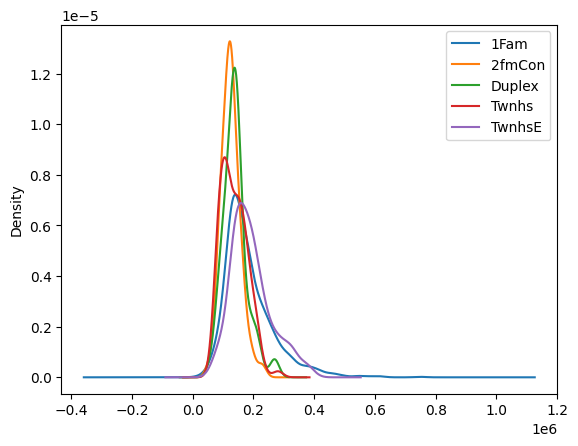

In [175]:
ap.groupby("Bldg.Type")["price"].plot(kind="density", legend=True)

In [176]:
ap.groupby("Bldg.Type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


Based on the descriptive statistics, it seems end-unit townhouse has the highest average sale price, followed closely by 1fam. In terms of variability, single-family homes (1Fam) have the highest variance (and standard deviation) in transaction prices, reflecting a much wider spread of prices compared to condos, duplexes, and townhomes.